# `classification.XGBoostClassifier`

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import slickml

print(f"Loaded SlickML Version = {slickml.__version__}")

Loaded SlickML Version = 0.2.0b0


In [18]:
from slickml.classification import XGBoostClassifier

help(XGBoostClassifier)

Help on class XGBoostClassifier in module slickml.classification._xgboost:

class XGBoostClassifier(sklearn.base.BaseEstimator, sklearn.base.ClassifierMixin)
 |  XGBoostClassifier(num_boost_round: Optional[int] = 200, sparse_matrix: Optional[bool] = False, scale_mean: Optional[bool] = False, scale_std: Optional[bool] = False, importance_type: Optional[str] = 'total_gain', params: Optional[Dict] = None) -> None
 |  
 |  XGBoost Classifier.
 |  
 |  This is wrapper using XGBoost classifier to train a XGBoost [xgboost-api]_ model using the number of
 |  boosting rounds from the inputs. This is also the base class for ``XGBoostCVClassifier``.
 |  
 |  Parameters
 |  ----------
 |  num_boost_round : int, optional
 |      Number of boosting rounds to fit a model, by default 200
 |  
 |  sparse_matrix : bool, optional
 |      Whether to convert the input features to sparse matrix with csr format or not. This would
 |      increase the speed of feature selection for relatively large/sparse dat

### Example 1: `XGBoostClassifer` mode for `breast-cancer` data set

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer()

X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    shuffle=True,
    stratify=y,
)

In [5]:
# custom params
params = {
    "eval_metric": "logloss",
    "learning_rate": 0.05,
    "max_depth": 2,
    "min_child_weight": 1,
    "gamma": 0.0,
}
clf = XGBoostClassifier(
    num_boost_round=333,
    params=params,
)
clf.fit(X_train, y_train)

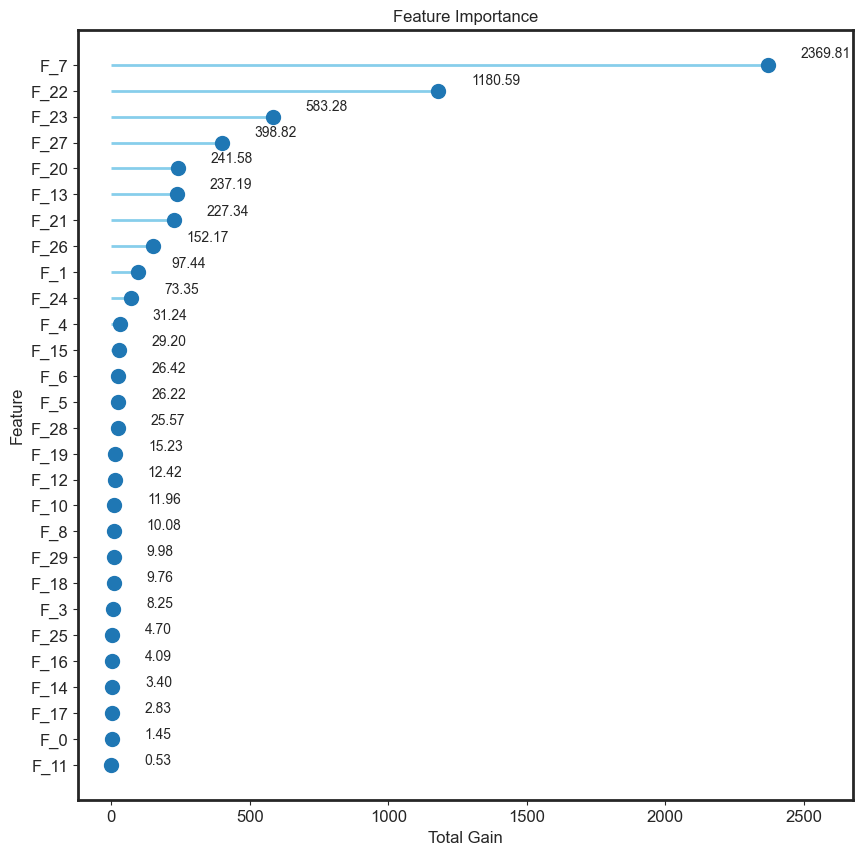

In [6]:
clf.plot_feature_importance(figsize=(10, 10))

In [7]:
# predic proba (or clf.y_pred_proba_)
# please note that y_test is optional
y_pred_proba = clf.predict_proba(X_test, y_test=None)
y_pred_proba[:10]

array([2.9615610e-04, 9.9289578e-01, 9.9988842e-01, 1.4098368e-02,
       6.6742289e-04, 9.9858427e-01, 5.4313021e-04, 9.9987185e-01,
       9.9901891e-01, 9.4267380e-01], dtype=float32)

In [8]:
# pred class (or clf.y_pred_)
# threshold can be set
y_pred = clf.predict(X_test, threshold=0.67)
y_pred[:10]

array([0, 1, 1, 0, 0, 1, 0, 1, 1, 1])

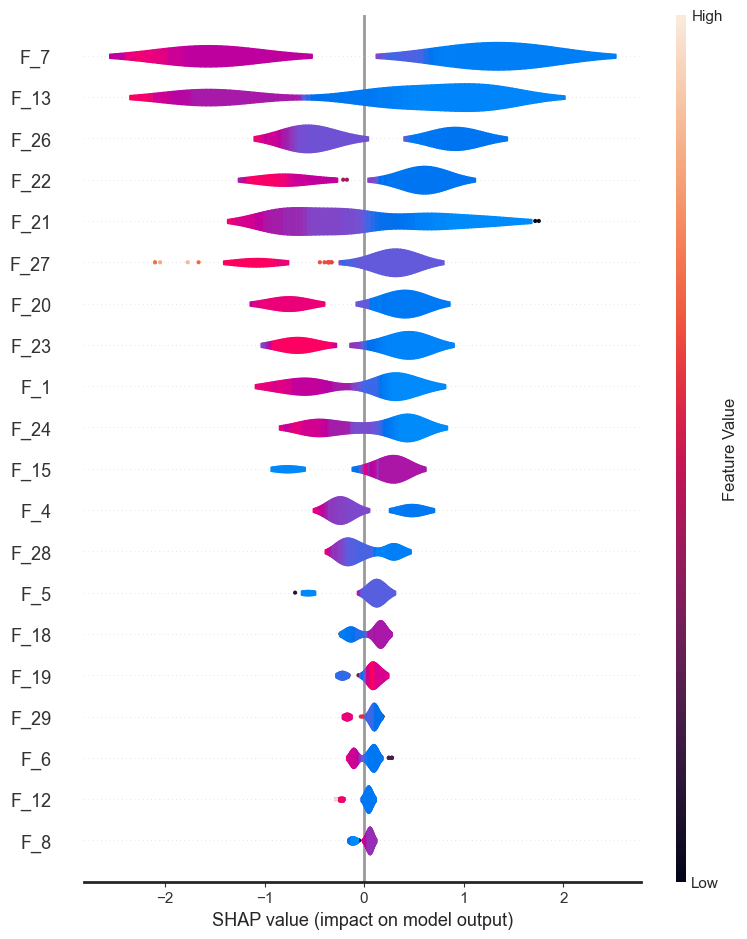

In [9]:
# shap summary plot violin on test data
clf.plot_shap_summary(plot_type="violin", validation=True)

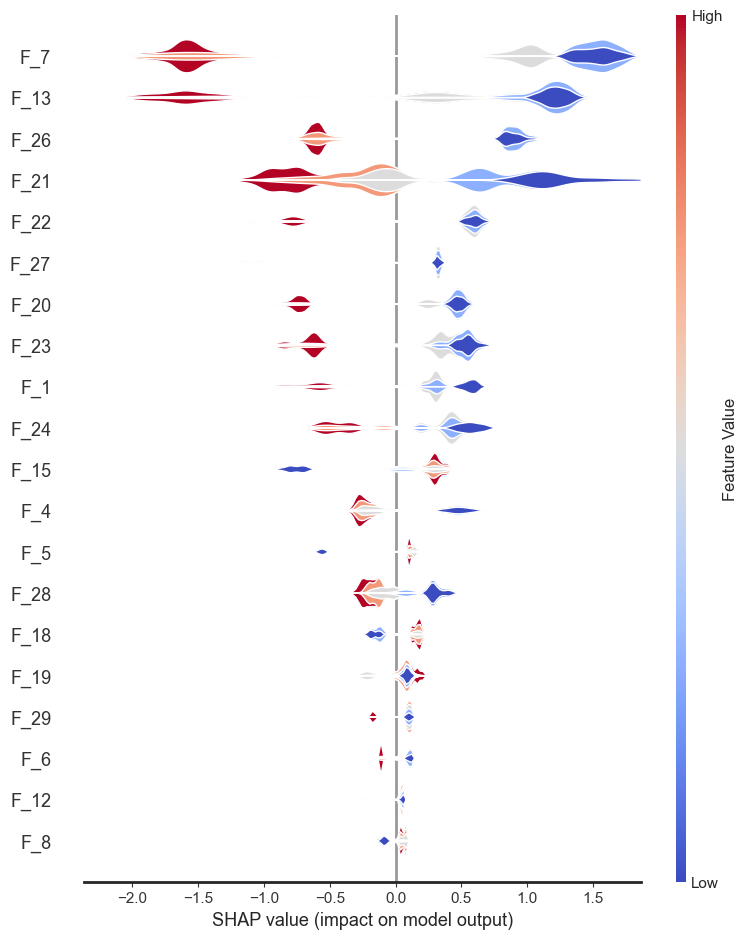

In [10]:
# shap summary plot layered violin plot on train data
clf.plot_shap_summary(
    plot_type="layered_violin",
    validation=False,
    layered_violin_max_num_bins=5,
)

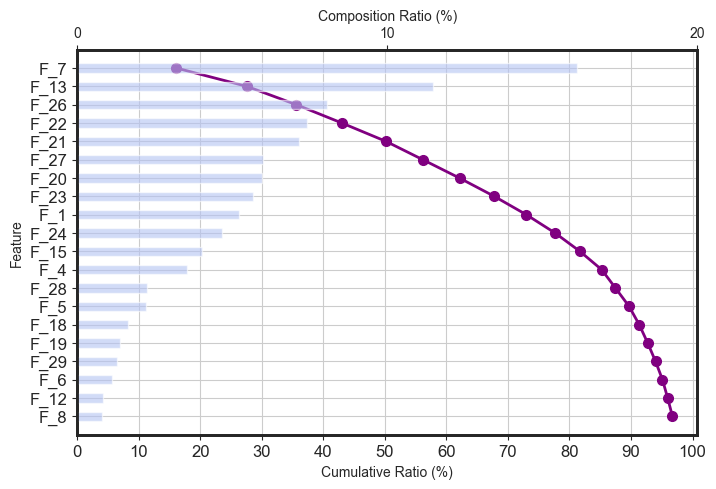

In [11]:
# shap waterfall plot
clf.plot_shap_waterfall()

In [12]:
clf.shap_values_test_[:10]

array([[-2.45163888e-02, -5.33121467e-01,  0.00000000e+00,
        -5.47607988e-02, -2.94750065e-01,  9.18692201e-02,
        -1.11415379e-01, -1.52638793e+00,  3.08056623e-02,
         0.00000000e+00, -1.06730491e-01, -1.02997869e-02,
        -2.02432021e-01, -1.35790551e+00, -3.19683626e-02,
         2.61463791e-01,  7.10896701e-02,  1.65566616e-02,
         1.29279077e-01,  9.14312750e-02, -7.50052750e-01,
        -8.26981664e-01, -7.38600075e-01, -6.11525714e-01,
        -3.23734730e-01, -3.05122398e-02, -5.88259280e-01,
        -1.04769552e+00, -2.57290155e-01, -1.61801696e-01],
       [ 2.64786649e-02,  3.04480910e-01,  0.00000000e+00,
         7.69849271e-02,  5.60961664e-01,  1.34926766e-01,
         2.76369788e-02,  1.14011443e+00, -9.31310430e-02,
         0.00000000e+00,  2.41883900e-02,  5.08755725e-03,
         4.24037687e-02,  5.42724252e-01,  6.63411058e-03,
         3.81929398e-01,  7.71730617e-02,  2.28314195e-04,
        -1.84746832e-01,  8.09346288e-02,  2.70542532e-

In [13]:
clf.shap_values_train_[:10]

array([[-2.84561142e-03,  3.14187735e-01,  0.00000000e+00,
         8.10228810e-02,  4.69230503e-01, -5.53096652e-01,
         8.55695903e-02,  1.57830083e+00, -9.30825993e-02,
         0.00000000e+00,  5.35759553e-02,  3.06836441e-02,
         5.14457747e-02,  1.17802644e+00,  6.63411058e-03,
        -8.16662073e-01, -6.77873492e-02,  5.11635095e-02,
         1.49509028e-01,  8.08897614e-02,  2.77135968e-01,
        -9.71184596e-02,  5.56182146e-01,  2.53566444e-01,
         5.65313637e-01,  4.13810909e-02,  9.39876735e-01,
         2.87881434e-01,  6.06240183e-02,  1.00401573e-01],
       [-2.45163888e-02, -6.09648824e-01,  0.00000000e+00,
        -5.47607988e-02, -2.97087193e-01,  9.95006338e-02,
        -1.11415379e-01, -1.49534249e+00,  2.36716866e-02,
         0.00000000e+00,  3.03639919e-02,  1.05798654e-02,
         3.05032879e-02, -1.34270692e+00,  4.90133762e-02,
        -2.39266874e-03, -1.18519656e-01, -3.54694598e-03,
        -1.37677699e-01,  4.55442555e-02, -7.07468390e-

In [14]:
# feature importance (or clf.feature_importance_)
clf.get_feature_importance()

,feature,total_gain
0,F_7,2369.813965
1,F_22,1180.588135
2,F_23,583.281616
3,F_27,398.821716
4,F_20,241.584671
5,F_13,237.192764
6,F_21,227.344009
7,F_26,152.169357
8,F_1,97.443611
9,F_24,73.352585


In [15]:
clf.model_

## You can use the `BinaryClassificationMetrics` class to evaluate your model

In [16]:
from slickml.metrics import BinaryClassificationMetrics

metrics = BinaryClassificationMetrics(y_test, y_pred_proba)

,Accuracy,Balanced Accuracy,ROC AUC,PR AUC,Precision,Recall,Average Precision,F-1 Score,F-2 Score,F-0.50 Score,Threat Score,TP,TN,FP,FN
Threshold = 0.500 | Average = Binary,0.959000,0.952000,0.993000,0.996000,0.955000,0.981000,0.996000,0.968000,0.976000,0.960000,0.938000,105,59,5,2


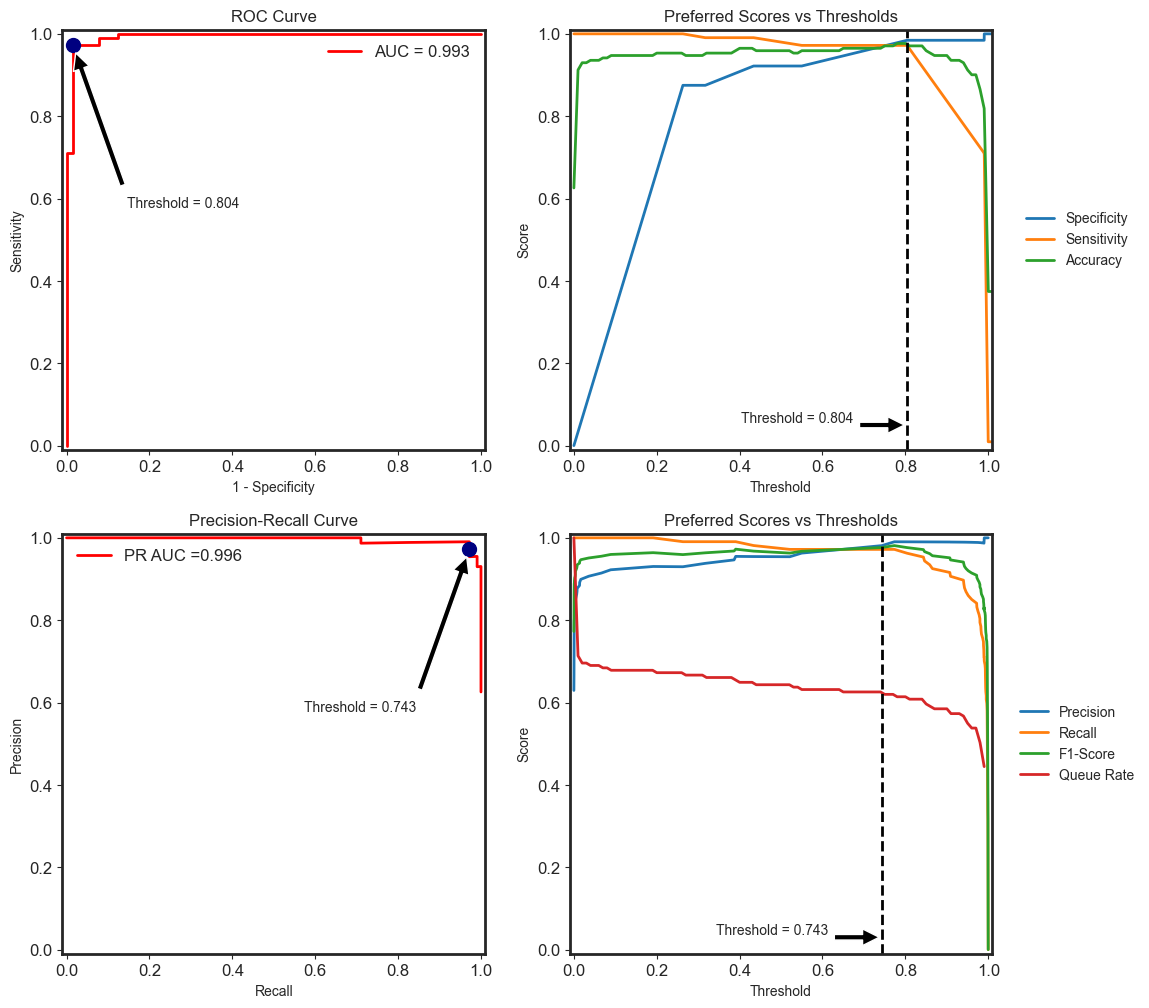

In [17]:
metrics.plot()